In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow
from sklearn import preprocessing

In [2]:
data=pd.read_csv("winequality-white.csv",sep=";")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Text(-2.575000000000003, 0.5, 'Frequency')

<Figure size 432x288 with 0 Axes>

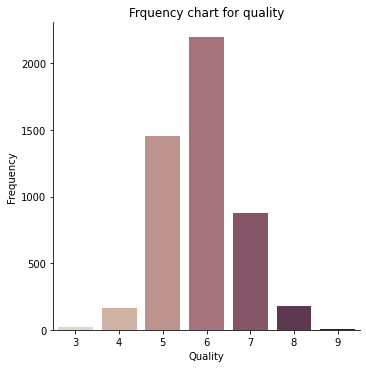

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
sns.catplot(x="quality",kind="count",palette="ch:.25",data=data)
plt.title("Frquency chart for quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")

<AxesSubplot:>

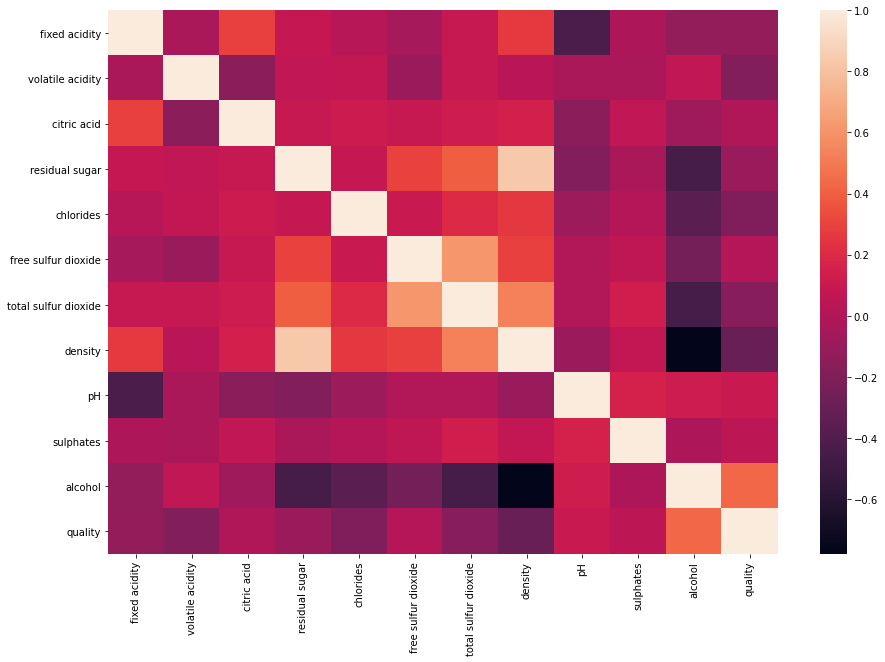

In [5]:
corr_mat=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat)

In [6]:
data["quality"]=pd.cut(data["quality"],bins=(0,5.99,6,10),labels=["Bad","Good","Best"])

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good


# Using ML Models

In [9]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,classification_report
X1=data[["fixed acidity", "volatile acidity","citric acid", "residual sugar", "chlorides","free sulfur dioxide","density","sulphates","alcohol"]]
X2=data[["fixed acidity", "volatile acidity", "citric acid","residual sugar", "chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
data["quality"]=data["quality"].map({"Bad":0,"Good":1,"Best":2})
Y=data["quality"]
X1_train, X1_test, Y_train, Y_test=train_test_split(X1,Y,test_size=0.2,random_state=23)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
model=RandomForestClassifier()
model.fit(X1_train,Y_train)
Y_pred=model.predict(X1_test)
accuracy_score(Y_test,Y_pred)

0.7030612244897959

In [21]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       332
           1       0.64      0.75      0.69       424
           2       0.75      0.58      0.66       224

    accuracy                           0.70       980
   macro avg       0.72      0.69      0.70       980
weighted avg       0.71      0.70      0.70       980



In [30]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X1_train,Y_train)
Y_pred=model.predict(X1_test)
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.6244897959183674
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       332
           1       0.61      0.66      0.63       424
           2       0.63      0.57      0.60       224

    accuracy                           0.62       980
   macro avg       0.63      0.62      0.62       980
weighted avg       0.63      0.62      0.62       980



In [41]:
pred_list=[]
for i in range(100):
    model=IsolationForest(contamination=i/100)
    model.fit(X1_train,Y_train)
    Y_pred=model.predict(X1_test)
    pred_list.append(accuracy_score(Y_test,Y_pred))
max(pred_list)

0.4316326530612245

# Using Neural Network 

In [56]:
from tensorflow import keras

In [72]:
model= keras.Sequential()
model.add(keras.layers.Dense(units=11,input_dim=11,activation=tensorflow.nn.tanh))
model.add(keras.layers.Dense(units=3,activation=tensorflow.nn.tanh))
model.compile(keras.Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 36        
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X1_train,Y_train, epochs=500)
Y_pred=model.predict(X_test)
y_test_class = np.argmax(Y_test,axis=1)
y_pred_class = np.argmax(Y_pred,axis=1)

Epoch 1/500


ValueError: in user code:

    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Users/kartikeygarg/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: expected axis -1 of input shape to have value 11 but received input with shape [None, 9]
